In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
check_line_list = [5,105,205,1105,1205,1305,1405,1505,305,405,505,605,705,805,905,1005,1605,1705,1805,1905,2005,2105]
save_root_path = 'statistics_using_v100_model_efficiency/'
rld = databaseloader(file_path='../log/test_model_running_effciency_float32_V100_ARC4.xls')
c = calculator()


In [2]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        if '.pt' in current_model_name:
            current_model_name = current_model_name.replace('.pt', '')
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'resnext50_32x4d', 'resnext101_32x8d', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p']
[2189.9666, 2189.732, 2201.809, 76.110275, 135.43117, 169.84492, 316.1884, 437.7406, 2188.5906, 2186.3591, 2189.7734, 2186.799, 2191.1182, 2186.2605, 557.4191, 2187.1748, 152.72687, 580.1648, 97.15695, 134.33293, 184.48973, 211.79109]
[0.6801847863421244, 0.7501208164685522, 0.8504248679619195, 0.18063417763168843, 0.1816981469969221, 0.28248903551531157, 0.3200192028999709, 0.39711549952943415, 0.653998263122503, 0.9984464999538432, 0.8088810564672713, 0.8457402046451534, 0.7216942688005474, 0.7624891250961809, 0.007568488618062474, 0.7140205875452921, 0.1272089099676066, 0.09425855923802828, 0.16046414397234798, 0.16345632236618712, 0.2126438468

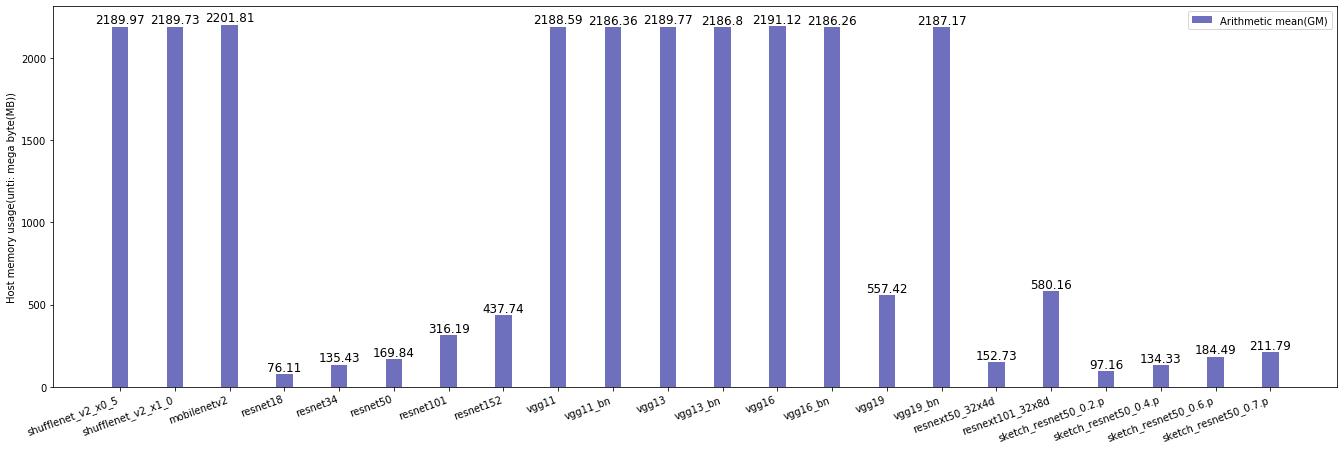

In [3]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

bar_width = 0.3
bar = plt.bar(x, model_mean_list, bar_width, color=(111/256, 112/256, 190/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Arithmetic mean(GM)"], loc='upper right')

plt.ylabel('Host memory usage(unti: mega byte(MB))')
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [4]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        if '.pt' in current_model_name:
            current_model_name = current_model_name.replace('.pt', '')
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'resnext50_32x4d', 'resnext101_32x8d', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p']
[4.609432, 4.674538, 4.607426, 1.1651825, 1.3481721, 1.5465112, 2.0004692, 2.4627118, 5.513823, 7.088823, 5.499759, 7.114289, 5.5356007, 7.186367, 1.3645045, 7.283457, 1.5501775, 2.845158, 1.3098496, 1.3243407, 1.3777936, 1.4713467]
[0.018057503978331724, 0.012719522307833131, 0.07711728810292673, 0.029015900360457092, 0.024556356957301073, 0.032458896427238315, 0.030153271604627108, 0.017668914555790227, 0.027466463847454214, 0.020883504453661494, 0.025884296104478288, 0.019339840306925815, 0.02510012328243416, 0.02233465157789105, 0.028958227813562942, 0.02287428409734371, 0.027676839109711526, 0.020931027528996893, 0.02886045338671339, 0.026664

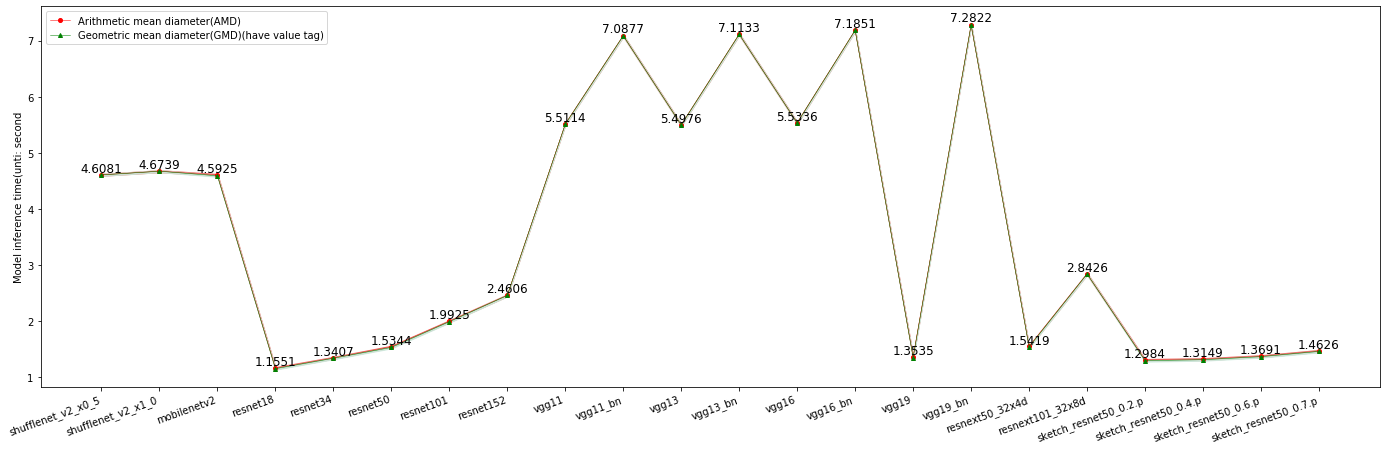

In [5]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+2,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')

plt.ylabel('Model inference time(unti: second')
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [6]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        if '.pt' in current_model_name:
            current_model_name = current_model_name.replace('.pt', '')
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'resnext50_32x4d', 'resnext101_32x8d', 'sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p']
[8.639846, 8.649847, 8.776211, 15.444048, 20.159592, 31.291504, 45.018383, 61.76, 8.794423, 9.025591, 9.005855, 9.254742, 9.124831, 9.366461, 52.017365, 9.486019, 52.58519, 116.1207, 35.722057, 39.127014, 40.769028, 44.130047]
[0.01580761976664391, 0.019414296399899555, 0.08542529130442844, 0.008134667074093826, 0.011020455695167186, 0.01849629221502269, 0.04670911708947045, 0.194717033423089, 0.016197367748748803, 0.019269318010655567, 0.02034783260872608, 0.014791871471873108, 0.01729837693851266, 0.013423384001724159, 0.0345619281554832, 0.01478762143657164, 0.21200305379411333, 0.21304224451620257, 0.08150517058928841, 0.12116326231848262, 0.0

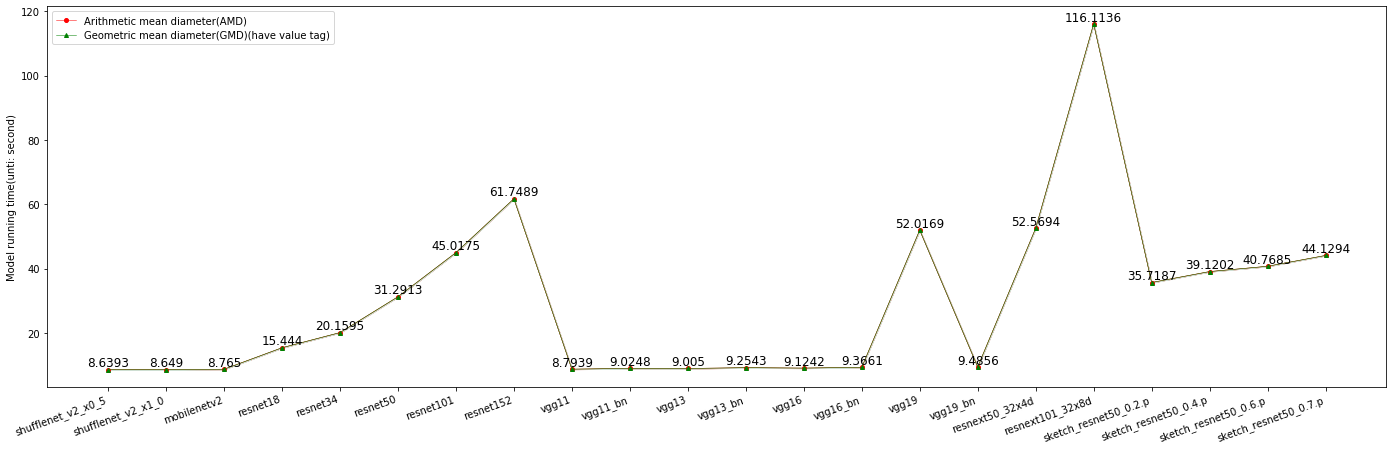

In [7]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+2,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')
# plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)"], loc='upper left')


plt.ylabel('Model running time(unti: second)')
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()